In [1]:
# organize imports
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import normalize
from keras.callbacks import Callback
from keras.callbacks import ReduceLROnPlateau
from keras.optimizers import Adam
from keras.models import load_model
from keras.utils import plot_model

from sklearn.model_selection import train_test_split
import keras.backend as K
import numpy as np
import h5py
import os
import matplotlib.pyplot as plt
import random
import pydot
import tensorflow as tf


Using TensorFlow backend.


In [12]:
# seed for reproducing same results
seed = 9
np.random.seed(seed)


# Visualize the training (and test) dataset

### Zero final velocity dataset with only first iterations of GuSTO stored

/usr/local/lib/python3.5/dist-packages/h5py/_hl/dataset.py:313: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  "Use dataset[()] instead.", H5pyDeprecationWarning)


Training data
Random i = 340


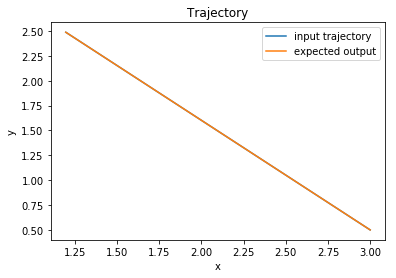

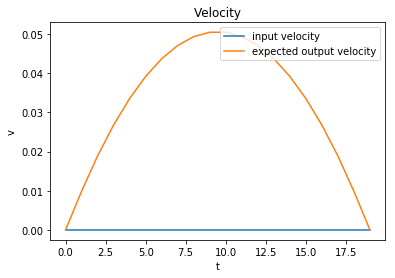

Random i = 106


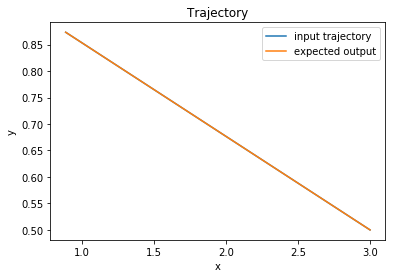

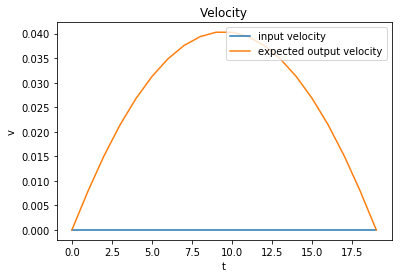

Random i = 295


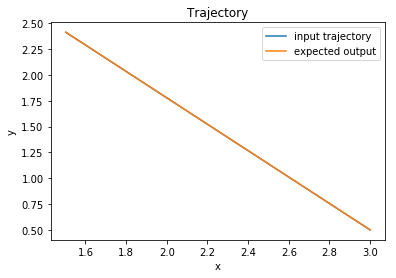

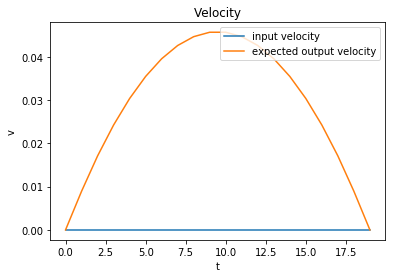

Random i = 260


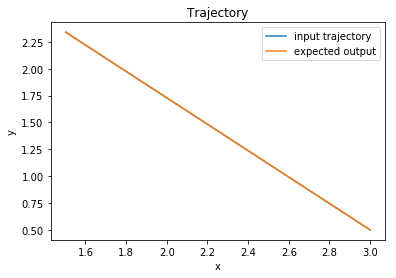

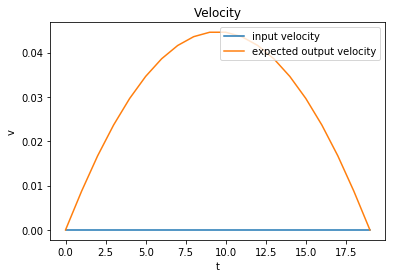

Random i = 447


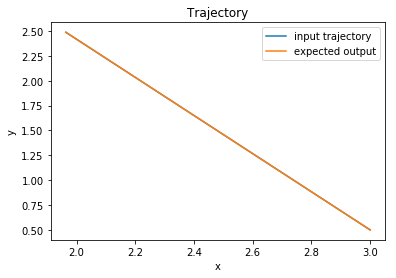

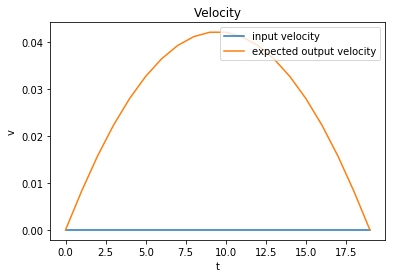

Random i = 24


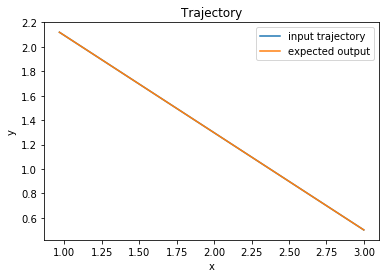

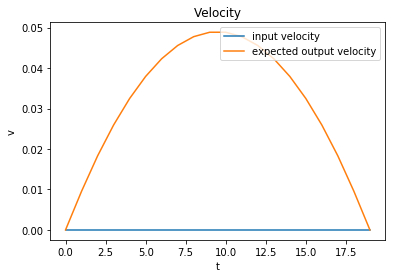

Random i = 292


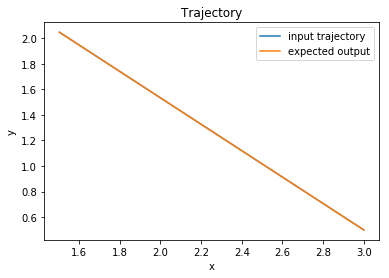

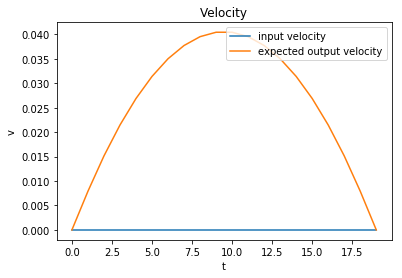

Random i = 365


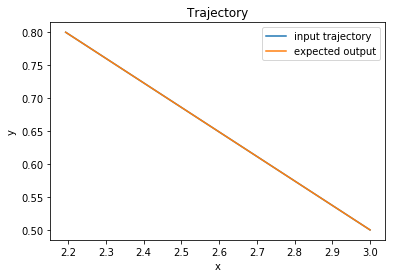

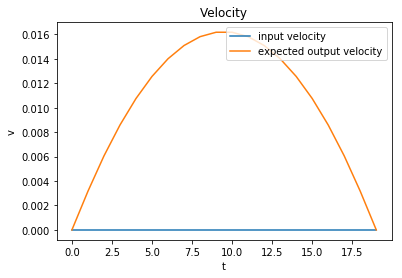

Test data
Random i = 119


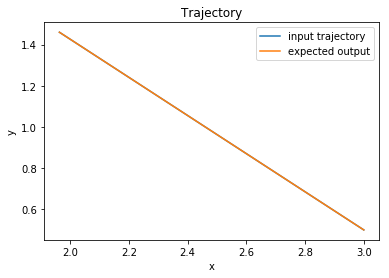

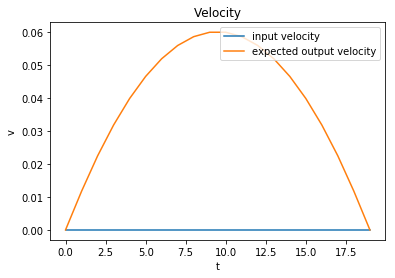

Random i = 32


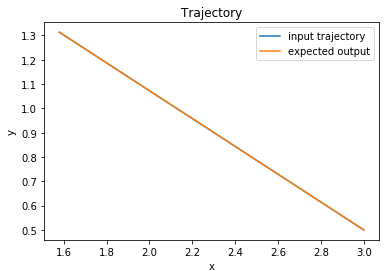

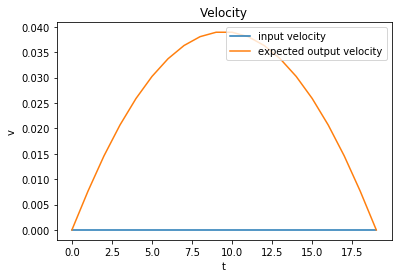

Random i = 130


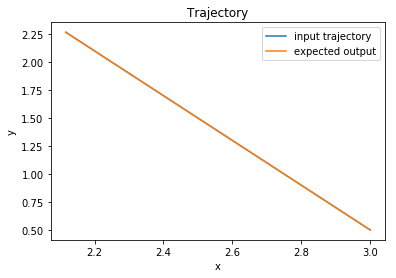

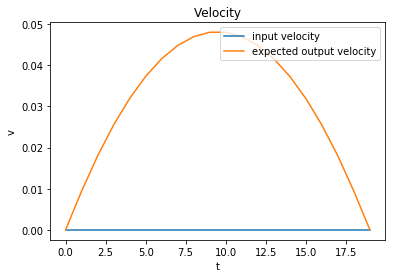

Random i = 156


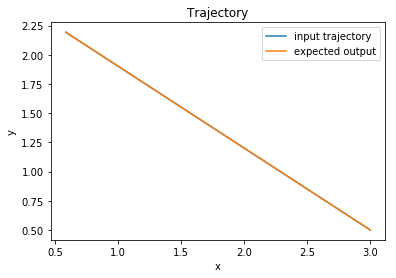

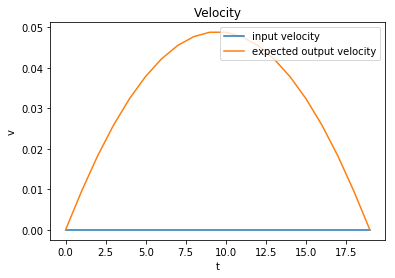

Random i = 10


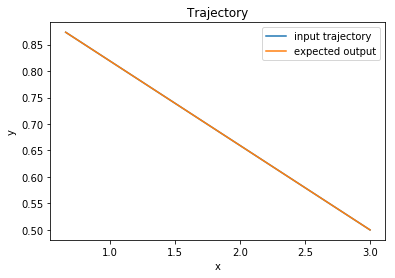

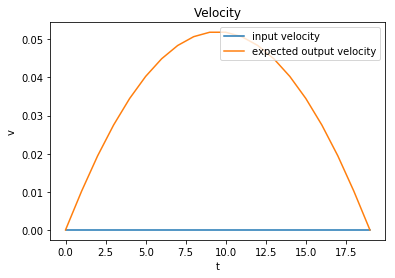

Random i = 52


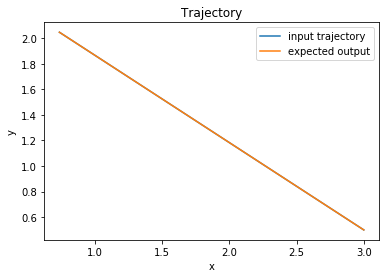

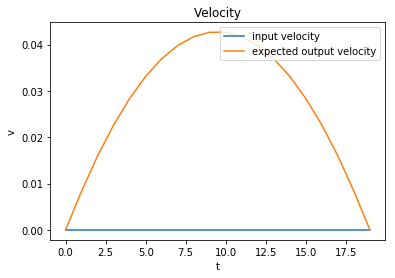

Random i = 139


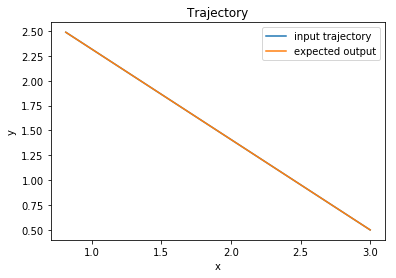

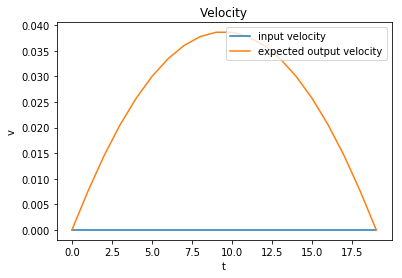

Random i = 12


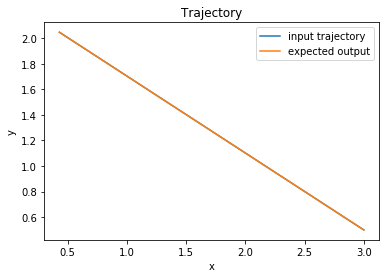

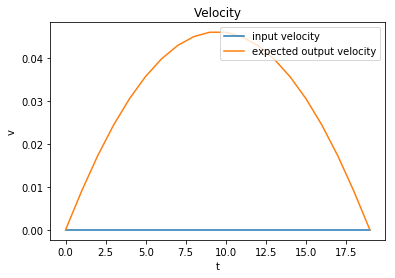

In [13]:
(X_train, X_test, Y_train, Y_test) = loadData(["NoObstacleFirst3IterEndsInOKtf80ZeroFinVelOnly1Iter.jld2"], testRatio = 0.25, fieldNames = ["train_input_collected_first_only", "train_output_collected_first_only"])

print("Training data")
for x in range(8):
    i = random.randint(1,np.size(X_train,0)-1)
    print("Random i =",i)
    plotTrajectoryInputAndOutput(X_train[i,:],Y_train[i,:])
    plotVelocitiesInputAndOutput(X_train[i,:],Y_train[i,:])
print("Test data")
for x in range(8):
    i = random.randint(1,np.size(X_test,0)-1)
    print("Random i =",i)
    plotTrajectoryInputAndOutput(X_test[i,:],Y_test[i,:])
    plotVelocitiesInputAndOutput(X_train[i,:],Y_train[i,:])



## Note that the xy trajectory always remains a straight line and the velocity changes from a constant zero to a parabolic curve

# Try to overfit data! Bigger network and dataset with zero final velocity

[0. 0. 0. 0. 0. 0. 0. 0. 0.]
[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 -3.71207106e-28
  1.52276790e-27  0.00000000e+00 -6.37509888e-02  4.63915646e-02
  0.00000000e+00  5.21828034e-03 -3.79734014e-03  0.00000000e+00
 -1.06471915e-01  7.74795630e-02  0.00000000e+00  9.98927949e-03
 -7.26919397e-03  0.00000000e+00 -1.30359951e-01  9.48628752e-02
  0.00000000e+00  1.41639037e-02 -1.03070660e-02  0.00000000e+00
 -1.37926147e-01  1.00368793e-01  0.00000000e+00  1.77421530e-02
 -1.29109564e-02  0.00000000e+00 -1.31681557e-01  9.58246076e-02
  0.00000000e+00  2.07240274e-02 -1.50808650e-02  0.00000000e+00
 -1.14137232e-01  8.30576107e-02  0.00000000e+00  2.31095269e-02
 -1.68167919e-02  0.00000000e+00 -8.78042245e-02  6.38950938e-02
  0.00000000e+00  2.48986516e-02 -1.81187370e-02  0.00000000e+00
 -5.51935869e-02  4.01643483e-02  0.00000000e+00  2.60914013e-02
 -1.89867004e-02  0.00000000e+00 -1.88163711e-02  1.36926656e-02
  0.00000000e+00  2.66877762e-02 -1.94206822e-02  0.00000000e

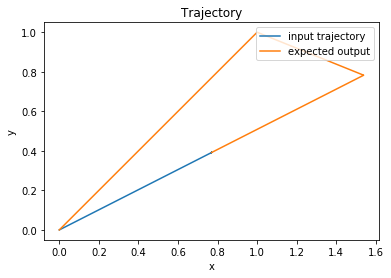

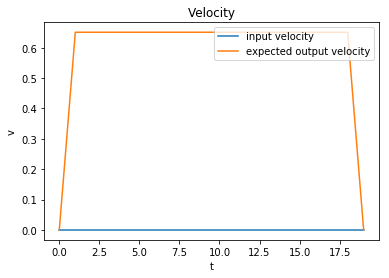

(20,)
(20,)
(20,)
(20,)


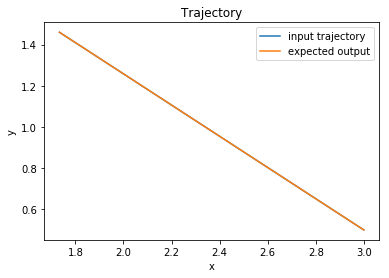

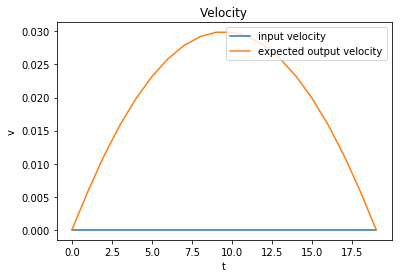

In [57]:
(X_train, X_test, Y_train, Y_test) = loadData(["NoObstacleFirst3IterEndsInOKtf80ZeroFinVelOnly1Iter.jld2"], testRatio = 0.25, fieldNames = ["train_input_collected_first_only", "train_output_collected_first_only"])
# Normalize all datasets to be between [0,1]
X = np.vstack([X_train, X_test])
Y = np.vstack([Y_train, Y_test])
print(Y_train[1:10,1])
xMin = np.amin(X, axis=0)
xMax = np.amax(X, axis=0)
xRange = xMax - xMin
xRange[xRange == 0] = 1.0
xRange[abs(xRange) <1.0e-20]=1.0


X_train = (X_train-xMin)/xRange
X_test = (X_test-xMin)/xRange

yMin = np.amin(Y, axis=0)
yMax = np.amax(Y, axis=0)
yRange = yMax - yMin
yRange[yRange == 0] = 1.0
yRange[abs(yRange) <1.0e-20]=1.0

Y_train = (Y_train-yMin)/yRange
Y_test = (Y_test-yMin)/yRange





In [45]:
test = np.array([ 0.00000000e+00 , 0.00000000e+00, -3.71207106e-28 , 1.52276790e-27,
  0.00000000e+00 ,-6.37509888e-02,  4.63915646e-02 , 0.00000000e+00,
  5.21828034e-03])
test[test==0]=1.0
test[abs(test) <1.0e-25]=1.0
print(test)

[ 1.          1.          1.          1.          1.         -0.06375099
  0.04639156  1.          0.00521828]


In [22]:
(X_train, X_test, Y_train, Y_test) = loadData(["NoObstacleFirst3IterEndsInOKtf80ZeroFinVelOnly1Iter.jld2"], testRatio = 0.25, fieldNames = ["train_input_collected_first_only", "train_output_collected_first_only"])

# Overfit to exactly 2 samples!
# numSamples = 30
# X_train = X_train[0:numSamples,:]
# X_test = X_test[0:numSamples,:]
# Y_train = Y_train[0:numSamples,:]
# Y_test = Y_test[0:numSamples,:]

# Normalize all datasets to be between [0,1]
X = np.vstack([X_train, X_test])
Y = np.vstack([Y_train, Y_test])

xMin = np.amin(X, axis=0)
xMax = np.amax(X, axis=0)
xRange = xMax - xMin
xRange[xRange == 0] = 1.0

X_train = (X_train-xMin)/xRange
X_test = (X_test-xMin)/xRange

yMin = np.amin(Y_train, axis=0)
yMax = np.amax(Y_train, axis=0)
yRange = yMax - yMin
yRange[yRange == 0] = 1.0

Y_train = (Y_train-yMin)/yRange
Y_test = (Y_test-yMin)/yRange


# What's weird is that if you make X_train a (1,182) vector of random numbers betweeen (-1,1) 
# and Y_train the original vector, the loss stops at 0.0010 or 0.0012 and won't go down

# Switch to tanh activation and the loss stops going down at 0.0214

# tanh just seems horrible. Even with y_train as all zeros, the loss stops at 0.0060 
# whereas for relu with y_train as all zeros, we get 1e-6 range loss

# using last layer as linear with y_train as initial makes the loss stop at 2.68e-4
# adding another layer at end as linear makes loss go to 1e-4

# I can use 1 sample of X_train with 2 ending linear layers and  make the loss stop at 2.81e-4

# All linear makes it go to 0.0016

# alternating relu and linear is 2.56e-4

# double size (layers) network is 2.0248e-4

# Now I normalized the Y_train values to be between 0 and 1. Kept the double size relu linear layers 
# and tried 30 samples. Loss stops at 0.0635

# Changed network so all layers are relu. Again tried 30 samples. Loss stops at 0.0901

# Added a few layers. Loss stops going down at 0.0886

# Put in all the samples. Loss stop at 0.0468

# Also normalized x now. Loss drops to 0.03 after a few epochs.

# create the model
model = Sequential()
# model.add(Dense(512, input_dim=182, activation='tanh'))
# model.add(Dense(1024, kernel_initializer='uniform', activation='tanh'))
# model.add(Dense(512, kernel_initializer='uniform', activation='tanh'))
# model.add(Dense(1024, kernel_initializer='uniform', activation='tanh'))
# model.add(Dense(512, kernel_initializer='uniform', activation='tanh'))
# model.add(Dense(1024, kernel_initializer='uniform', activation='tanh'))
# model.add(Dense(512, kernel_initializer='uniform', activation='tanh'))
# model.add(Dense(1024, kernel_initializer='uniform', activation='tanh'))
# model.add(Dense(512, kernel_initializer='uniform', activation='tanh'))
# model.add(Dense(180, kernel_initializer='uniform', activation='tanh'))
model.add(Dense(512, input_dim=182, activation='relu'))
model.add(Dense(1024, kernel_initializer='uniform', activation='relu'))
model.add(Dense(512, kernel_initializer='uniform', activation='relu'))
model.add(Dense(1024, kernel_initializer='uniform', activation='relu'))
model.add(Dense(512, kernel_initializer='uniform', activation='relu'))
model.add(Dense(1024, kernel_initializer='uniform', activation='relu'))
model.add(Dense(512, kernel_initializer='uniform', activation='relu'))
model.add(Dense(1024, kernel_initializer='uniform', activation='relu'))
model.add(Dense(512, kernel_initializer='uniform', activation='relu'))
# model.add(Dense(1024, kernel_initializer='uniform', activation='relu'))
# model.add(Dense(512, kernel_initializer='uniform', activation='relu'))
# model.add(Dense(1024, kernel_initializer='uniform', activation='relu'))
# model.add(Dense(512, kernel_initializer='uniform', activation='relu'))
# model.add(Dense(512, input_dim=182, activation='linear'))
# model.add(Dense(1024, kernel_initializer='uniform', activation='relu'))
# model.add(Dense(512, kernel_initializer='uniform', activation='linear'))
# model.add(Dense(1024, kernel_initializer='uniform', activation='relu'))
# model.add(Dense(512, kernel_initializer='uniform', activation='linear'))
# model.add(Dense(1024, kernel_initializer='uniform', activation='relu'))
# model.add(Dense(512, kernel_initializer='uniform', activation='linear'))
# model.add(Dense(1024, kernel_initializer='uniform', activation='relu'))
# model.add(Dense(512, kernel_initializer='uniform', activation='linear'))
# model.add(Dense(1024, kernel_initializer='uniform', activation='relu'))
# model.add(Dense(512, kernel_initializer='uniform', activation='linear'))
# model.add(Dense(1024, kernel_initializer='uniform', activation='relu'))
# model.add(Dense(512, kernel_initializer='uniform', activation='linear'))
# model.add(Dense(1024, kernel_initializer='uniform', activation='relu'))
# model.add(Dense(512, kernel_initializer='uniform', activation='linear'))
# model.add(Dense(1024, kernel_initializer='uniform', activation='relu'))
model.add(Dense(180, kernel_initializer='uniform', activation='relu'))

# compile the model
customAdam = Adam(lr=1e-3, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(loss='mean_squared_error', optimizer=customAdam, metrics=['mean_squared_error'])
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1,
                              patience=2, min_lr=1e-50)

lrHist = []

In [14]:
# (X_train, X_test, Y_train, Y_test) = loadData(["NoObstacleFirst3IterEndsInOKtf80ZeroFinVelOnly1Iter.jld2"], testRatio = 0.25, fieldNames = ["train_input_collected_first_only", "train_output_collected_first_only"])
# # Overfit to exactly 2 samples!
# numSamples = 2
# X_train = X_train[1:numSamples,:]
# # X_test = X_test[1:4,:]
# Y_train = Y_train[1:numSamples,:]
# # Y_test = Y_test[1:4,:]

# # create the model
# model = Sequential()
# model.add(Dense(512, input_dim=182, activation='relu'))
# model.add(Dense(1024, kernel_initializer='uniform', activation='relu'))
# model.add(Dense(512, kernel_initializer='uniform', activation='relu'))
# model.add(Dense(1024, kernel_initializer='uniform', activation='relu'))
# model.add(Dense(512, kernel_initializer='uniform', activation='relu'))
# model.add(Dense(180, kernel_initializer='uniform', activation='relu'))

# # compile the model
# customAdam = Adam(lr=1e-3, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
# model.compile(loss='mean_squared_error', optimizer=customAdam, metrics=['mean_squared_error'])
# reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1,
#                               patience=1, min_lr=1e-50)

# lrHist = []

Instructions for updating:
Colocations handled automatically by placer.


In [23]:
# fit the model
histSimple = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=30, batch_size=1, verbose=1, callbacks=[reduce_lr, CustomMetrics()])

# evaluate the model
scores = model.evaluate(X_test, Y_test)

Train on 484 samples, validate on 162 samples
Epoch 1/30
484/484 [==============================] - 34s 71ms/step - loss: 0.0958 - mean_squared_error: 0.0958 - val_loss: 0.0872 - val_mean_squared_error: 0.0872
Learning rate:  0.001
Epoch 2/30
 96/484 [====>.........................] - ETA: 32s - loss: 0.0788 - mean_squared_error: 0.0788

KeyboardInterrupt: 

In [ ]:
# summarize history for loss
plt.plot(histSimple.history['loss'])
plt.plot(histSimple.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# show evolution of learning rate
plt.plot(lrHist)
plt.title('learning rate evolution')
plt.ylabel('learning rate')
plt.xlabel('epoch')
plt.yscale('log')
plt.show()

In [16]:
# save model to hdf5 file
# model.save('NoObstacleFirst3IterEndsInOKtf80ZeroFinVelOnly1IterNormalized.h5') 

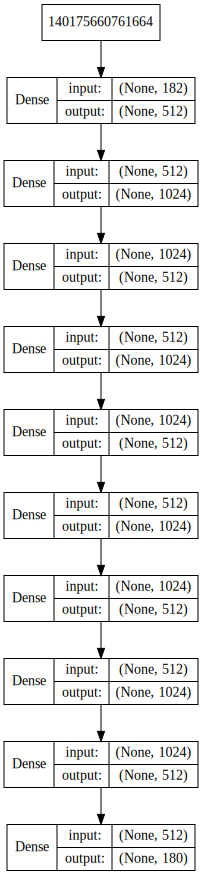

In [24]:
# plot_model(model, to_file='NoObstacleFirst3IterEndsInOKtf80ZeroFinVelOnly1IterBiggerNetwork.png')
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

model = load_model('NoObstacleFirst3IterEndsInOKtf80ZeroFinVelOnly1IterNormalized.h5')
SVG(model_to_dot(model, show_shapes=True, show_layer_names=False).create(prog='dot', format='svg'))

# Run model on some inputs and plot results

## Newer model, bigger network, first iteration only

### Try training data

In [25]:
# model = load_model('NoObstacleFirst3IterEndsInOKtf80ZeroFinVelOnly1IterBiggerNetwork.h5')
(X_train, X_test, Y_train, Y_test) = loadData(["NoObstacleFirst3IterEndsInOKtf80ZeroFinVelOnly1Iter.jld2"], testRatio = 0.25, fieldNames = ["train_input_collected_first_only", "train_output_collected_first_only"])

Idx = [0,1,2]
X_train_np_array=np.array(X_train)
NN_input = (X_train_np_array-xMin)/xRange
NN_output = model.predict(NN_input[Idx])
NN_output = NN_output*yRange + yMin

/usr/local/lib/python3.5/dist-packages/h5py/_hl/dataset.py:313: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  "Use dataset[()] instead.", H5pyDeprecationWarning)


Training Examples


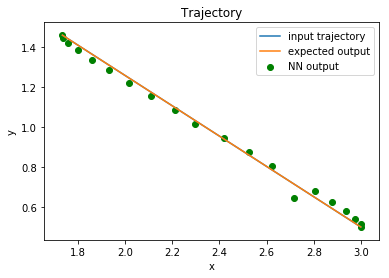

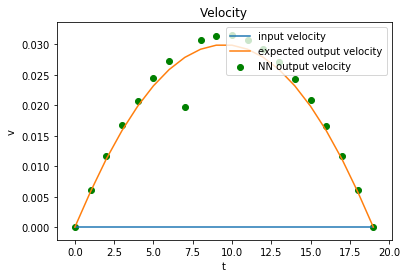

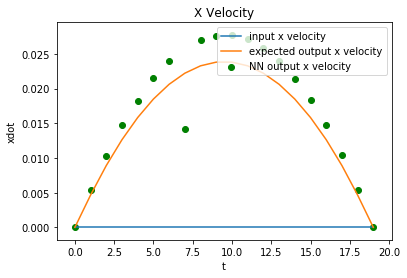

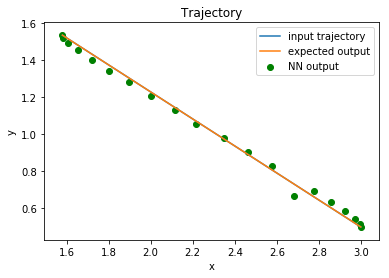

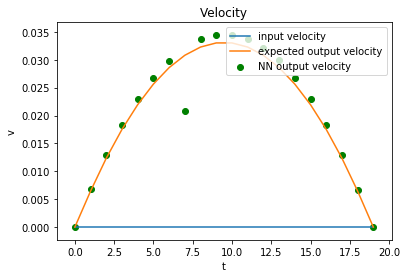

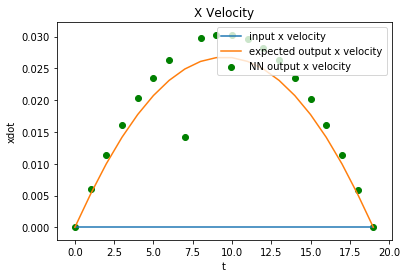

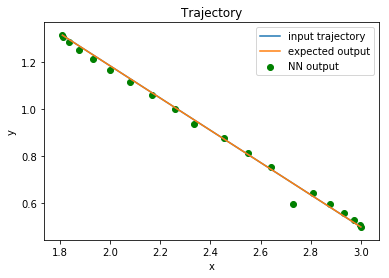

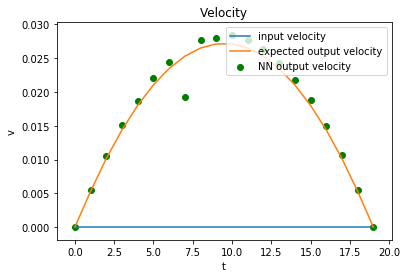

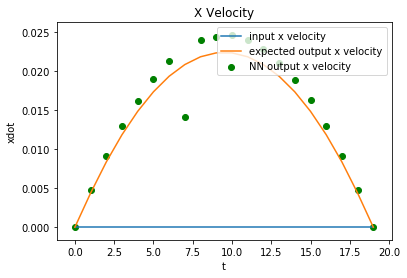

In [26]:
print("Training Examples")
for NN_idx, train_idx in enumerate(Idx):
    plotTrajectoryInputExpectedAndNN(X_train[train_idx,:],Y_train[train_idx,:],NN_output[NN_idx,:])
    plotVelocitiesInputExpectedAndNN(X_train[train_idx,:],Y_train[train_idx,:],NN_output[NN_idx,:])
    plotXVelocityInputExpectedAndNN(X_train[train_idx,:],Y_train[train_idx,:],NN_output[NN_idx,:])



### Try test data

In [27]:
# model = load_model('NoObstacleFirst3IterOKDecayLRModel.h5')
Idx = [61,83,100, 123]
X_test_np_array=np.array(X_test)
NN_output = model.predict(X_test_np_array[Idx])
NN_output = NN_output*yRange + yMin

(4, 180)
Test Examples


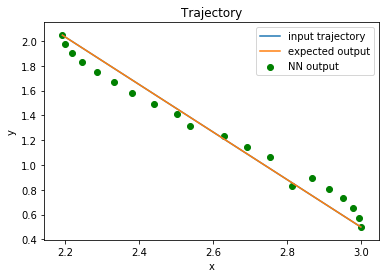

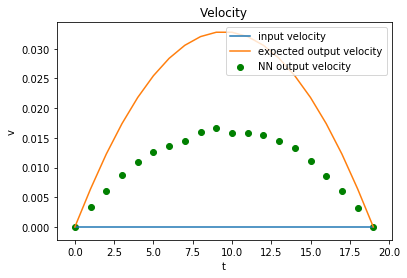

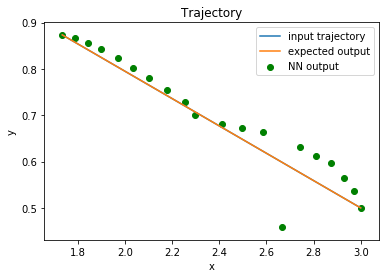

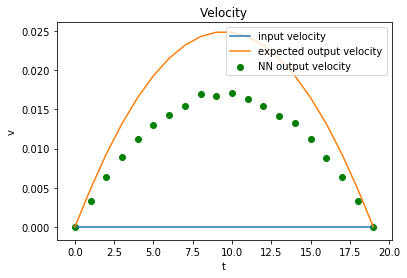

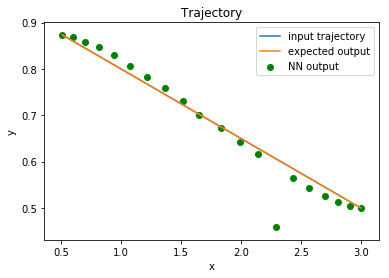

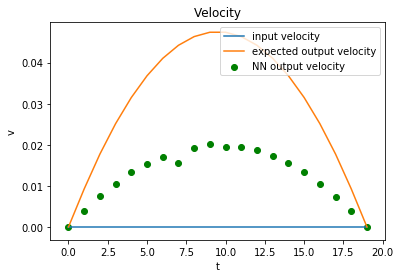

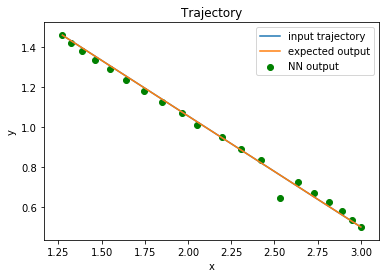

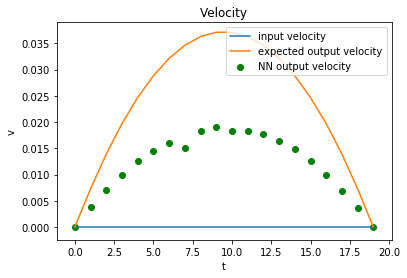

In [28]:
print(np.shape(NN_output))
print("Test Examples")
for NN_idx, test_idx in enumerate(Idx):
    plotTrajectoryInputExpectedAndNN(X_test[test_idx,:],Y_test[test_idx,:],NN_output[NN_idx,:])
    plotVelocitiesInputExpectedAndNN(X_test[test_idx,:],Y_test[test_idx,:],NN_output[NN_idx,:])


In [37]:
for i in range(np.size(model.layers,0)):
    print(model.layers[i]).get_weights()
    

AttributeError: 'NoneType' object has no attribute 'get_weights'

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_449 (Dense)            (None, 512)               93696     
_________________________________________________________________
dense_450 (Dense)            (None, 1024)              525312    
_________________________________________________________________
dense_451 (Dense)            (None, 512)               524800    
_________________________________________________________________
dense_452 (Dense)            (None, 1024)              525312    
_________________________________________________________________
dense_453 (Dense)            (None, 512)               524800    
_________________________________________________________________
dense_454 (Dense)            (None, 1024)              525312    
_________________________________________________________________
dense_455 (Dense)            (None, 512)               524800    
__________

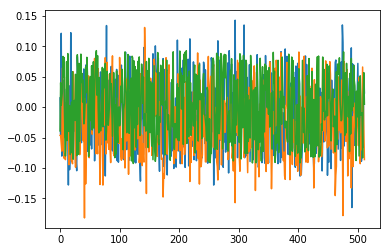

In [69]:
print(model.summary())
wts0 = model.get_layer(index = 0).get_weights()[0]
# print(np.shape(wts0))
# print(np.shape(wts0[0]))
# print(np.shape(wts0[1]))
print(wts0.shape)
# print(np.shape(np.squeeze(wts0)))
plt.plot(wts0[0])
plt.plot(wts0[1])
plt.plot(wts0[2])

plt.show()

In [70]:
print(wts0[wts0==0])
# So none of the weights are 0

[]


(512, 180)


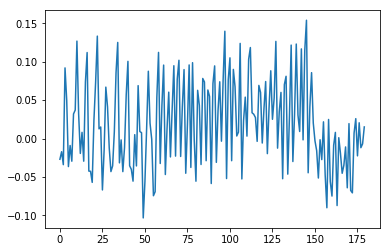

[]


In [73]:
wts9 = model.get_layer(index = 9).get_weights()[0]
print(wts9.shape)
plt.plot(wts9[0])
plt.plot(wts9[1])
plt.plot(wts9[2])
plt.show()
print(wts9[wts9==0])
# None of these weights are 0 either.

# Helper functions below

## Load data and create test and training inputs and outputs

In [3]:
# filenames must be a list
def loadData(filenames, testRatio = 0.25, fieldNames = ["train_input_collected", "train_output_collected"]):
    # load simple dataset
    for i, filename in enumerate(filenames):
        PATH_FILE_TRAINING3 = os.getcwd()+"/"+filename
        f = h5py.File(PATH_FILE_TRAINING3, "r")
        # split into input and output variables
        if i==0:
            X       = f[fieldNames[0]].value;     
            X      = X.transpose();
            Y        = f[fieldNames[1]].value;      
            Y       = Y.transpose();
        else:
            X1       = f[fieldNames[0]].value;     
            X1      = X1.transpose();
            Y1        = f[fieldNames[1]].value;      
            Y1       = Y1.transpose();
            X = np.vstack((X,X1))
            Y = np.vstack((Y,Y1))   
    
    # split the data into training (75%) and testing (25%)
    (X_train, X_test, Y_train, Y_test) = train_test_split(X, Y, test_size=testRatio, random_state=seed)

    # Examine shape of data
#     print(np.shape(X))
#     print(np.shape(Y))
#     print(np.shape(X_train))
#     print(np.shape(X_test))
#     print(np.shape(Y_train))
#     print(np.shape(Y_test))
    return X_train, X_test, Y_train, Y_test



## Create custom metric to print learning rate after each epoch

In [4]:
class CustomMetrics(Callback):
    def on_epoch_end(self, epoch, logs=None):
        current_lr = K.eval(self.model.optimizer.lr)
        lrHist.append(current_lr)
        print("Learning rate: ",current_lr)
#     def on_batch_end(self, batch, logs):
#         weights, _biases = model.get_weights()
#         w1, w2 = weights
#         weights = [w1[0], w2[0]]
#         print('on_batch_end() model.weights:', weights)
#         weights_history.append(weights)

## Function to plot trajectory from row of training data

In [5]:
def plotTrajectoryFromInput(X_data):
    # X_data has length 182 ~ 
    # 20 sets of (x,y,theta,xdot,ydot,thetadot) for all N=6 dimensions = 120
    # 20 values of (u1, u2, u3) = 60 
    # + omega,delta = 2
    x = X_data[0:120:6] 
    y = X_data[1:120:6]
#     print(np.shape(x))
#     print(np.shape(y))
    plt.plot(x, y)
    plt.title('Trajectory')
    plt.ylabel('y')
    plt.xlabel('x')
    # plt.legend(['train', 'test'], loc='upper left')
    plt.show()

In [18]:
def plotTrajectoryInputAndOutput(X_data, Y_data):
    # X_data has length 182 ~ 
    # 20 sets of (x,y,theta,xdot,ydot,thetadot) for all N=6 dimensions = 120
    # 20 values of (u1, u2, u3) = 60 
    # + omega,delta = 2
    xIn = X_data[0:120:6] 
    yIn = X_data[1:120:6]
    print(np.shape(xIn))
    print(np.shape(yIn))
    
    xOut = xIn + Y_data[0:120:6]
    yOut = yIn + Y_data[1:120:6]
    print(np.shape(xOut))
    print(np.shape(yOut))
    
    plt.plot(xIn, yIn)
    plt.plot(xOut, yOut)
    plt.title('Trajectory')
    plt.ylabel('y')
    plt.xlabel('x')
    plt.legend(['input trajectory', 'expected output'], loc='upper right')
    plt.show()

In [7]:
def plotVelocitiesInputAndOutput(X_data, Y_data):
    # X_data has length 182 ~ 
    # 20 sets of (x,y,theta,xdot,ydot,thetadot) for all N=6 dimensions = 120
    # 20 values of (u1, u2, u3) = 60 
    # + omega,delta = 2
    xDotIn = np.array(X_data[3:120:6])
    yDotIn = np.array(X_data[4:120:6])
    velIn = np.sqrt(xDotIn**2 + yDotIn**2)
#     print(np.shape(xIn))
#     print(np.shape(yIn))
    
    xDotOut = np.array(xDotIn + Y_data[3:120:6])
    yDotOut = np.array(yDotIn + Y_data[4:120:6])
    velOut = np.sqrt(xDotOut**2 + yDotOut**2)
#     print(np.shape(xOut))
#     print(np.shape(yOut))
    
    plt.plot(velIn)
    plt.plot(velOut)
    plt.title('Velocity')
    plt.ylabel('v')
    plt.xlabel('t')
    plt.legend(['input velocity', 'expected output velocity'], loc='upper right')
    plt.show()

In [8]:
def plotTrajectoryInputExpectedAndNN(X_data, Y_data, NN_data):
    # X_data has length 182 ~ 
    # 20 sets of (x,y,theta,xdot,ydot,thetadot) for all N=6 dimensions = 120
    # 20 values of (u1, u2, u3) = 60 
    # + omega,delta = 2
    xIn = X_data[0:120:6] 
    yIn = X_data[1:120:6]
#     print(np.shape(xIn))
#     print(np.shape(yIn))
    
    xExp = xIn + Y_data[0:120:6]
    yExp = yIn + Y_data[1:120:6]
#     print(np.shape(xOut))
#     print(np.shape(yOut))

    xNN = xIn + NN_data[0:120:6]
    yNN = yIn + NN_data[1:120:6]
    
    plt.plot(xIn, yIn)
    plt.plot(xExp, yExp)
    plt.scatter(xNN, yNN,color='g')
    plt.title('Trajectory')
    plt.ylabel('y')
    plt.xlabel('x')
    plt.legend(['input trajectory', 'expected output', 'NN output'], loc='upper right')
    plt.show()

In [9]:
def plotVelocitiesInputExpectedAndNN(X_data, Y_data, NN_data):
    # X_data has length 182 ~ 
    # 20 sets of (x,y,theta,xdot,ydot,thetadot) for all N=6 dimensions = 120
    # 20 values of (u1, u2, u3) = 60 
    # + omega,delta = 2
    xDotIn = np.array(X_data[3:120:6])
    yDotIn = np.array(X_data[4:120:6])
    velIn = np.sqrt(xDotIn**2 + yDotIn**2)
#     print(np.shape(xIn))
#     print(np.shape(yIn))
    
    xDotExp = np.array(xDotIn + Y_data[3:120:6])
    yDotExp = np.array(yDotIn + Y_data[4:120:6])
    velExp = np.sqrt(xDotExp**2 + yDotExp**2)
#     print(np.shape(xOut))
#     print(np.shape(yOut))
    xDotNN = np.array(xDotIn + NN_data[3:120:6])
    yDotNN = np.array(yDotIn + NN_data[4:120:6])
    velNN = np.sqrt(xDotNN**2 + yDotNN**2)
    
    plt.plot(velIn)
    plt.plot(velExp)
    plt.scatter(np.arange(np.size(velNN,0)), velNN,color='g')
    plt.title('Velocity')
    plt.ylabel('v')
    plt.xlabel('t')
    plt.legend(['input velocity', 'expected output velocity', 'NN output velocity'], loc='upper right')
    plt.show()

In [10]:
def plotXVelocityInputExpectedAndNN(X_data, Y_data, NN_data):
    # X_data has length 182 ~ 
    # 20 sets of (x,y,theta,xdot,ydot,thetadot) for all N=6 dimensions = 120
    # 20 values of (u1, u2, u3) = 60 
    # + omega,delta = 2
    xDotIn = np.array(X_data[3:120:6])
#     yDotIn = np.array(X_data[4:120:6])
#     velIn = np.sqrt(xDotIn**2 + yDotIn**2)
#     print(np.shape(xIn))
#     print(np.shape(yIn))
    
    xDotExp = np.array(xDotIn + Y_data[3:120:6])
#     yDotExp = np.array(yDotIn + Y_data[4:120:6])
#     velExp = np.sqrt(xDotExp**2 + yDotExp**2)
#     print(np.shape(xOut))
#     print(np.shape(yOut))
    xDotNN = np.array(xDotIn + NN_data[3:120:6])
#     yDotNN = np.array(yDotIn + NN_data[4:120:6])
#     velNN = np.sqrt(xDotNN**2 + yDotNN**2)
    
    plt.plot(xDotIn)
    plt.plot(xDotExp)
    plt.scatter(np.arange(np.size(xDotNN,0)), xDotNN,color='g')
    plt.title('X Velocity')
    plt.ylabel('xdot')
    plt.xlabel('t')
    plt.legend(['input x velocity', 'expected output x velocity', 'NN output x velocity'], loc='upper right')
    plt.show()

# Scraps

In [ ]:
print("x values in output are: ",Y_train[0:120:6])
print("max x values in output are: ",np.max(Y_train[0:120:6]))

print("real x values in output are: ",Y_train_recov[0:120:6])
print("max real x values in output are: ",np.max(Y_train_recov[0:120:6]))


print("Training data")
for x in range(1):
    i = x
    print("Random i =",i)
    # Nope this plot doesn't make sense because Y and X are normalized differently. 
    # The plot function adds xIn to xOut which doesn't make sense due to different normalization factors.
    plotTrajectoryInputAndOutput(X_train[i,:],Y_train[i,:])
    plotVelocitiesInputAndOutput(X_train[i,:],Y_train[i,:])
    X_train_recov = X_train * xRange + xMin
    Y_train_recov = Y_train * yRange + yMin
    plotTrajectoryInputAndOutput(X_train_recov[i,:],Y_train_recov[i,:])
    plotVelocitiesInputAndOutput(X_train_recov[i,:],Y_train_recov[i,:])